<a href="https://colab.research.google.com/github/SHIVENDRA-SINGH-TOMAR/Car_Price_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [76]:
car_data = pd.read_csv("/content/drive/MyDrive/Kaggle DataSets/Car Details/car data.csv")

In [77]:
car_data.head()   

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [79]:
car_data.shape

(301, 9)

In [80]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [82]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [85]:
print(car_data.Fuel_Type.value_counts())
print()
print(car_data.Seller_Type.value_counts())
print()
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [88]:
car_data.replace({"Fuel_Type" : {"Diesel":1, "Petrol":0, "CNG":2}},inplace=True)

car_data.replace({"Seller_Type" : {"Individual":1, "Dealer":0}},inplace=True)

car_data.replace({"Transmission" : {"Manual":0, "Automatic" : 1}}, inplace = True)

In [90]:
print(car_data.Fuel_Type.value_counts())
print()
print(car_data.Seller_Type.value_counts())
print()
print(car_data.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

0    195
1    106
Name: Seller_Type, dtype: int64

0    261
1     40
Name: Transmission, dtype: int64


In [91]:
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [93]:
X = car_data.drop(["Car_Name", "Selling_Price"], axis=1)
Y = car_data["Selling_Price"]

In [94]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [95]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=3)

MODEL


In [97]:
lin_reg_model = LinearRegression()

In [98]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Evalutaion


In [99]:
training_data_prediction = lin_reg_model.predict(X_train)

In [100]:
# R Square Error
error = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error)

R Squared Error :  0.8849815853900536


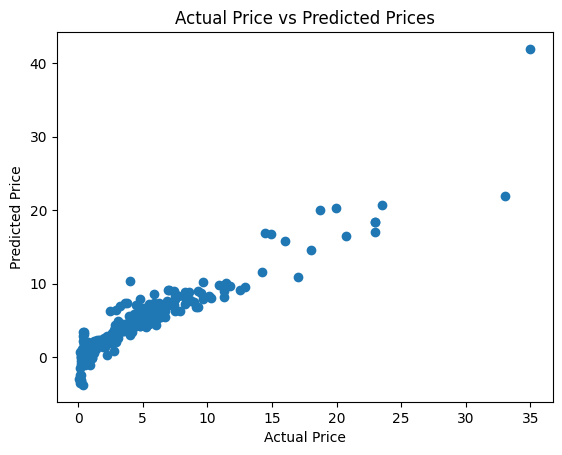

In [101]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [102]:
test_data_prediction = lin_reg_model.predict(X_test)

In [103]:
# R Square Error
error = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error)

R Squared Error :  0.7979072218427206


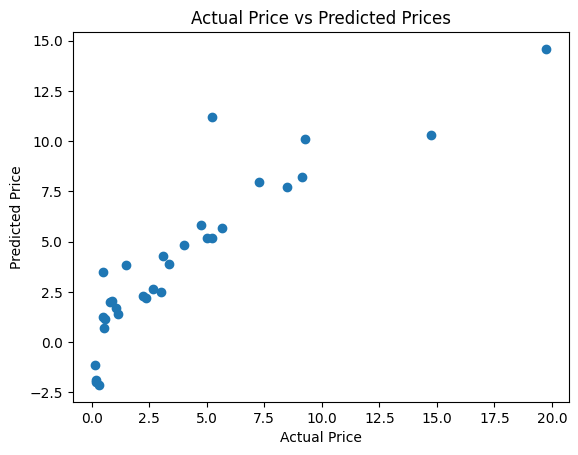

In [104]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

LASSO REGRESSION

In [106]:
las_reg_model = Lasso()

In [107]:
las_reg_model.fit(X_train, Y_train)

Lasso()

In [108]:
traning_data_prediction = las_reg_model.predict(X_train)

In [111]:
error = metrics.r2_score(Y_train, traning_data_prediction)
print("R Squared Error : ", error)

R Squared Error :  0.8469788692279795


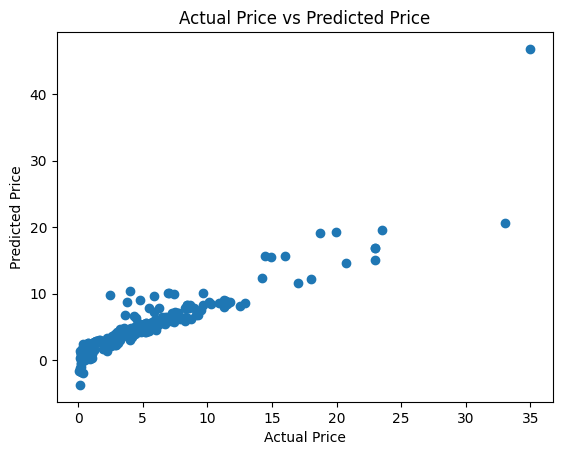

In [113]:
plt.scatter(Y_train, traning_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [115]:
test_data_prediction = las_reg_model.predict(X_test)

In [116]:
error = metrics.r2_score(Y_test, test_data_prediction)
print("R SQuared Error : ", error)

R SQuared Error :  0.7946492652998925


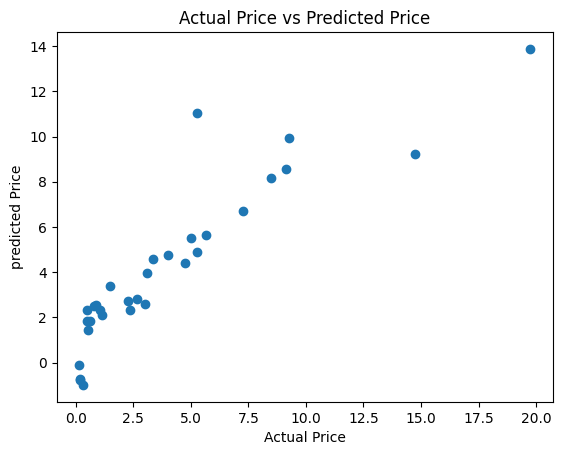

In [117]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()